1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize,curve_fit
import scipy.optimize as optimize


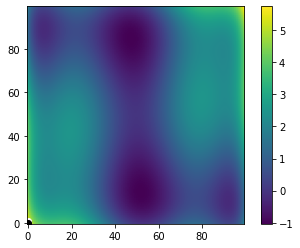

result for x0=[0.2,0.2]: [-0.08984203  0.71265604]
*********
result for x0=[0,0]  [0. 0.]


In [2]:
#inputs
x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)
x_in,y_in = np.meshgrid(x,y)

f_x_y = lambda x: (4-(2.1)*(x[0]**2) + ((x[0]**4) / 3))*(x[0]**2) + x[0]*x[1] + (4*(x[1]**2)-4)*(x[1]**2)


func_result = f_x_y([x_in,y_in])

## plotting 
plt.figure()
# as suggested in the question
zz = plt.imshow(func_result,origin="lower")
plt.colorbar(zz)

x0=[0.2,0.2]
x1=[0, 0]
res = minimize(f_x_y, x0) # Global minima
plt.scatter(res.x[0], res.x[1], color='white')
res2 = optimize.minimize(f_x_y, x1) # (𝑥,𝑦)=(0,0)
plt.scatter(res2.x[0], res2.x[1], color='black')
plt.show()

# res has a solution array called 'x'
print("result for x0=[0.2,0.2]:",res['x'])
print("*********")
print("result for x0=[0,0] ",res2['x'])

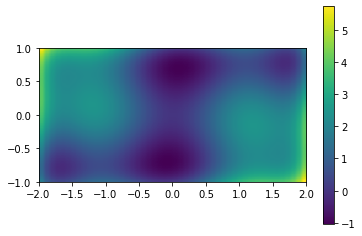

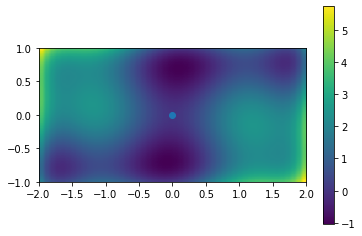

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + 4*x[1]**2) * x[1] **2)

#visualization of the regions
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
x1, y1 = np.meshgrid(x, y)
plt.figure()
plt.imshow(sixhump([x1, y1]), extent=[-2, 2, -1, 1])
plt.colorbar()


x_min = optimize.minimize(sixhump, x0=[0, 0])

plt.figure()
plt.imshow(sixhump([x1, y1]), extent=[-2, 2, -1, 1])
plt.colorbar()
plt.scatter(x_min.x[0], x_min.x[1])
plt.show()

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

the fit function: 18.045379 * sin( 3.172777 * x) + 15
the fit function: 25.115800 * sin( 2.093235 * (x - 0.667865)) - 35


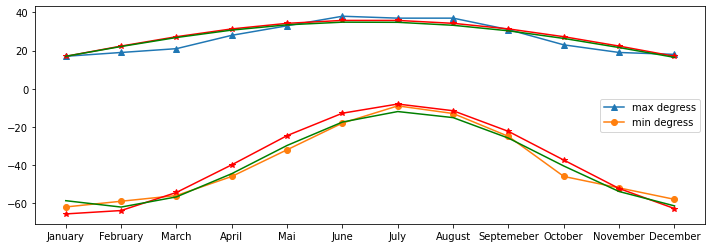

In [4]:
max_degress= [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_degrees = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months= ['January', 'February', 'March', 'April', 'Mai', 'June', 'July', 'August', 'Septemeber', 'October', 'November', 'December']

#1
f = plt.figure()
f.set_figwidth(12)
plt.plot(months,max_degress,label='max degress',marker='^')
plt.plot(months,min_degrees,label='min degress',marker='o')
plt.legend()

#2
x_data = np.linspace(0,1,12) 
y_data_max = 19* np.sin(np.pi * x_data) + 17 
plt.plot(months,y_data_max, 'r',marker='*')

y_data_min = 29* np.sin(np.pi * (1.9*x_data-0.55)) - 37 
plt.plot(months,y_data_min, 'r',marker='*')

#3
def fitted_max(x, A, nu):
    return (A * np.sin(nu * x) + 17) 

def fitted_min (x, A, nu,phi):
    return (A * np.sin(np.pi * (nu * x - phi)) - 37)
#*****************
popt, pcov = optimize.curve_fit(fitted_max, x_data, max_degress, p0=[2, 2], full_output=False)
print('the fit function: %f * sin( %f * x) + 15'% (popt[0],popt[1]) )
plt.plot(months,fitted_max(x_data,popt[0],popt[1]), 'g')
#*****************
popt_min, pcov_min = optimize.curve_fit(fitted_min, x_data, min_degrees, p0=[2, 2, 0.4], full_output=False)
print('the fit function: %f * sin( %f * (x - %f)) - 35'% (popt_min[0],popt_min[1],popt_min[2]) )
plt.plot(months,fitted_min(x_data,popt_min[0],popt_min[1],popt_min[2]), 'g')
plt.show()


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

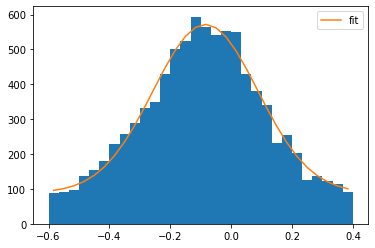

p_value: 0.0036347257759297147


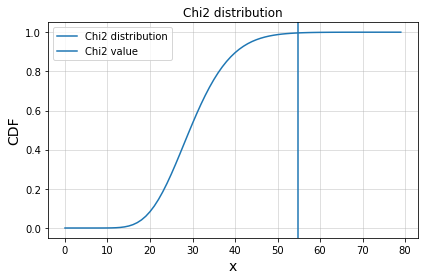

In [16]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.stats as stats
%matplotlib inline

def f(x, a, mean, std,offset):
    return offset + (a * stats.norm.pdf(x,mean,std))

infile = pd.read_pickle('residuals_261.pkl')
new_dict = dict(infile.item())
data = pd.DataFrame(new_dict)
ni,bins,_ = plt.hist(data['residuals'],bins=np.linspace(-0.6,0.4,31) )       
poisson =  np.sqrt(np.abs(ni))
bi = 0.5*(bins[1:]+bins[:-1])
popt3, pcov3 = optimize.curve_fit(f, bi, ni, p0=[100,0,1,1], full_output=False)
plt.plot(bi,f(bi,*popt3),label="fit")
plt.legend()
plt.show()
chi2 = np.sum(((ni-f(bi,*popt3))**2)/poisson**2)
p_value = 1 - stats.chi2.cdf(chi2,len(bi))
print("p_value:",p_value)
p = np.arange(0, 80, 1)
fig2 = plt.subplots(tight_layout=True)
plt.plot(p, stats.chi2.cdf(p, df=len(bi)))
plt.fill_between(bi, ni, where=(bi > chi2))
plt.axvline(chi2)
plt.title('Chi2 distribution')
plt.xlabel('x', size=14)
plt.ylabel('CDF', size=14)
plt.legend(['Chi2 distribution', 'Chi2 value'])
plt.grid(alpha=0.5)

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

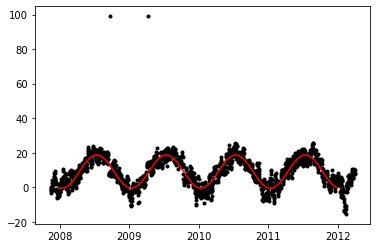

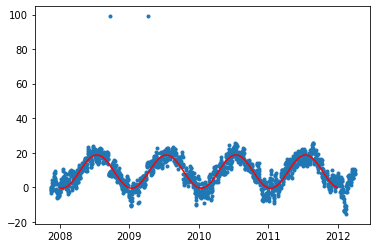

In [17]:
import numpy as np
from scipy.optimize import curve_fit

date,temperature = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)

def f2(t, a, c, d):
    return a * np.cos(2 * np.pi * t + c) + d

popt, pcov = curve_fit(f2, date,temperature)
plt.figure()
plt.plot(date[4700:6300], temperature[4700:6300], '.',color='black')
xfine = np.linspace(2008, 2012, 100)
plt.plot(xfine, f2(xfine, *popt), color='red')


def g2(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

popt, pcov = curve_fit(g2, date,temperature)
plt.figure()
plt.plot(date[4700:6300], temperature[4700:6300], '.')
xfine = np.linspace(2008, 2012, 100)
plt.plot(xfine, g2(xfine, *popt), color='red')

